# Quantum Channel for the Ancilla Density Matrix in Random Unitary Circuit

![](RUC.png)

We are going to evaluate the effect of the matrices along the diagonal slice on the ancilla density matrix. After summing over the indices $(s_1,s_2)$ for a neighbouring pair of sites we lose the final layer by unitarity, and we are left with:

![](MPO.png)

The input ancilla density matrix $\rho_{a_1a_2a_3,\bar a_1\bar a_2 \bar a_3}$ will be contracted in at the bottom, and the indices of the output matrix $\rho'_{b_1b_2b_3,\bar b_1\bar b_2 \bar b_3}$ will pop out of the top. The task is to evaluate $\rho'$ for a given assignment of indices $b_j$ if all components of $\rho$ are known.

The first thing to notice is that the final index is traced over, lowering the dimension of the density matrix before we start. We then work from the [middle out](https://www.youtube.com/watch?v=0rhdOt9bOHE), contracting in a $U$ and $\bar U$ at each step. This is an $O(N^2)$ operation, where $N=q^d$ for depth $d$.

In [1]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

In [4]:
from ruc_einsum import apply_gates, tensor_trace, trace_square, matrix_to_tensor, tensor_to_matrix, random_ρ, random_gates

## Complexity

In [5]:
timeit_results = []
q = 2
depths =  np.arange(5,13)
for d in depths:
    res = %timeit -o apply_gates(random_ρ(q, d), random_gates(q, d))
    timeit_results.append(res.average)

1.54 ms ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.14 ms ± 163 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.2 ms ± 358 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
43.4 ms ± 460 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
179 ms ± 6.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
705 ms ± 7.72 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.84 s ± 35.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.8 s ± 266 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Check the $4^d$ scaling

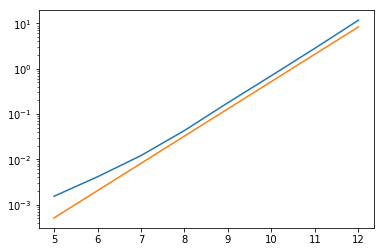

In [6]:
plt.semilogy(depths, timeit_results, depths, 0.0000005*4**depths)

## Purity

In [32]:
q = 2
depth = 7
# ρ = np.zeros(2*depth*[q])
# ρ[tuple(2*depth*[0])] = 1
ρ = random_ρ(q, depth)
purity_trace = np.array([])
eigenvalues = np.array([])

for step in range(1000):
    purity_trace = np.append(purity_trace, trace_square(ρ))
    eigenvalues = np.concatenate([eigenvalues, eigh(tensor_to_matrix(ρ), eigvals_only=True)])
    ρ = apply_gates(ρ, random_gates(q, depth))

In [33]:
-np.log(np.mean(purity_trace))

(2.006453752985156-5.097411852163591e-19j)

In [34]:
-np.log((4/5)**9)

2.0082919618278874

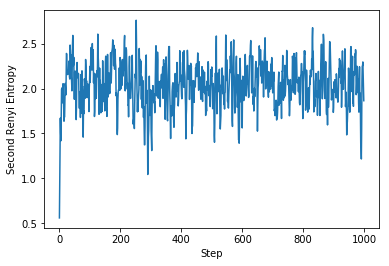

In [35]:
plt.plot(-np.log(purity_trace))
plt.xlabel("Step")
plt.ylabel("Second Renyi Entropy");

## Spectrum

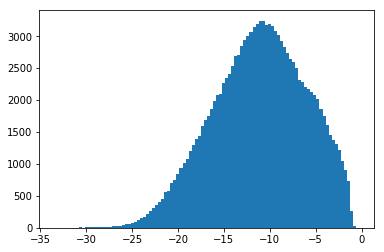

In [36]:
plt.hist(np.log(eigenvalues), bins=100);

Compare with fully random density matrix

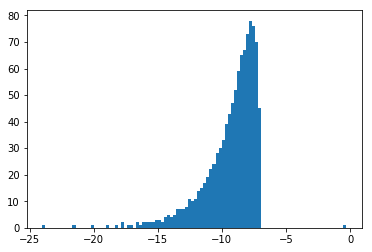

In [37]:
plt.hist(np.log(eigh(tensor_to_matrix(random_ρ(2, 10)), eigvals_only=True)), bins=100);